In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [57]:
df = pd.read_csv('airfoil_self_noise_data.csv')
df.head()

,frequency,attack-angle,chord-length,free-stream-velocity,suction-side-displacement-thickness,scaled-sound-pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


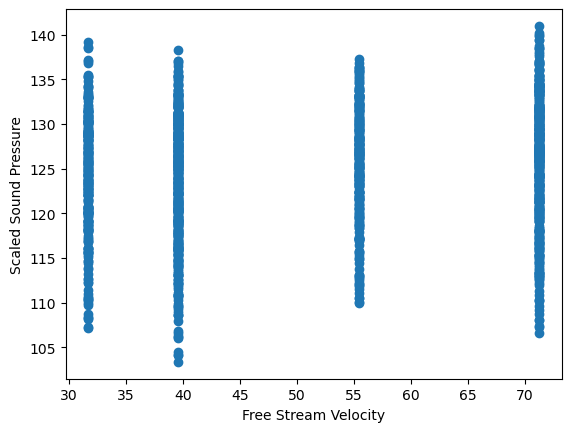

In [58]:
plt.scatter(df['free-stream-velocity'], df['scaled-sound-pressure'])
plt.xlabel('Free Stream Velocity')
plt.ylabel('Scaled Sound Pressure')
plt.show()

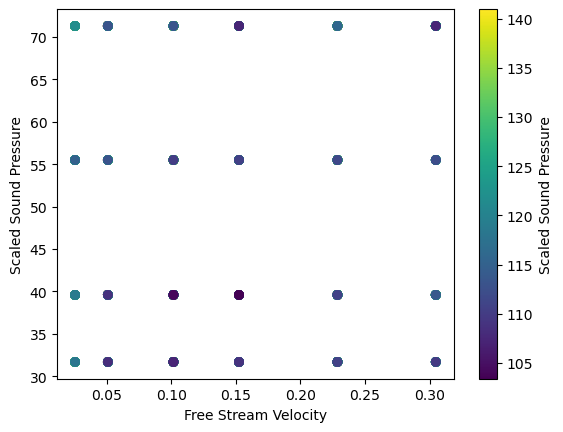

In [59]:
plt.scatter(df['chord-length'], df['free-stream-velocity'], c=df['scaled-sound-pressure'])
plt.xlabel('Free Stream Velocity')
plt.ylabel('Scaled Sound Pressure')
plt.colorbar(label='Scaled Sound Pressure')
plt.show()

In [60]:
X = df.drop('scaled-sound-pressure', axis=1)
y = df['scaled-sound-pressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=None)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=3)),   
    ("lr", LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12.057144232130078
